### House Prices Prediction using pyTorch


In [2]:
import pandas as pd
import torch 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

test_data = pd.read_csv('data/test.csv')
train_data = pd.read_csv('data/train.csv')


In [3]:
# Sort column names alphabetically and print them
sorted_columns = sorted(train_data.columns)
for column in sorted_columns:
    print(column)


1stFlrSF
2ndFlrSF
3SsnPorch
Alley
BedroomAbvGr
BldgType
BsmtCond
BsmtExposure
BsmtFinSF1
BsmtFinSF2
BsmtFinType1
BsmtFinType2
BsmtFullBath
BsmtHalfBath
BsmtQual
BsmtUnfSF
CentralAir
Condition1
Condition2
Electrical
EnclosedPorch
ExterCond
ExterQual
Exterior1st
Exterior2nd
Fence
FireplaceQu
Fireplaces
Foundation
FullBath
Functional
GarageArea
GarageCars
GarageCond
GarageFinish
GarageQual
GarageType
GarageYrBlt
GrLivArea
HalfBath
Heating
HeatingQC
HouseStyle
Id
KitchenAbvGr
KitchenQual
LandContour
LandSlope
LotArea
LotConfig
LotFrontage
LotShape
LowQualFinSF
MSSubClass
MSZoning
MasVnrArea
MasVnrType
MiscFeature
MiscVal
MoSold
Neighborhood
OpenPorchSF
OverallCond
OverallQual
PavedDrive
PoolArea
PoolQC
RoofMatl
RoofStyle
SaleCondition
SalePrice
SaleType
ScreenPorch
Street
TotRmsAbvGrd
TotalBsmtSF
Utilities
WoodDeckSF
YearBuilt
YearRemodAdd
YrSold


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [10]:
train_data.drop(columns=["Alley"], inplace=True)

In [11]:
for object in train_data['MasVnrType'].unique():
    print(object)

BrkFace
nan
Stone
BrkCmn


In [16]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = train_data.drop(columns=['SalePrice'], axis=1).copy()
y = train_data['SalePrice'].copy()

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

train_data = X_train.join(y_train)
val_data = X_val.join(y_val)


In [22]:
val_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 292 entries, 892 to 722
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    250 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   LotShape       292 non-null    object 
 7   LandContour    292 non-null    object 
 8   Utilities      292 non-null    object 
 9   LotConfig      292 non-null    object 
 10  LandSlope      292 non-null    object 
 11  Neighborhood   292 non-null    object 
 12  Condition1     292 non-null    object 
 13  Condition2     292 non-null    object 
 14  BldgType       292 non-null    object 
 15  HouseStyle     292 non-null    object 
 16  OverallQual    292 non-null    int64  
 17  OverallCond    292 non-null    int64  
 18  YearBuilt    

In [31]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1168 entries, 254 to 1126
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1168 non-null   int64  
 1   MSZoning       1168 non-null   object 
 2   LotFrontage    951 non-null    float64
 3   LotArea        1168 non-null   int64  
 4   Street         1168 non-null   object 
 5   LotShape       1168 non-null   object 
 6   LandContour    1168 non-null   object 
 7   Utilities      1168 non-null   object 
 8   LotConfig      1168 non-null   object 
 9   LandSlope      1168 non-null   object 
 10  Neighborhood   1168 non-null   object 
 11  Condition1     1168 non-null   object 
 12  Condition2     1168 non-null   object 
 13  BldgType       1168 non-null   object 
 14  HouseStyle     1168 non-null   object 
 15  OverallQual    1168 non-null   int64  
 16  OverallCond    1168 non-null   int64  
 17  YearBuilt      1168 non-null   int64  
 18  YearRemodAd

Text(0.5, 0, 'Sale Price')

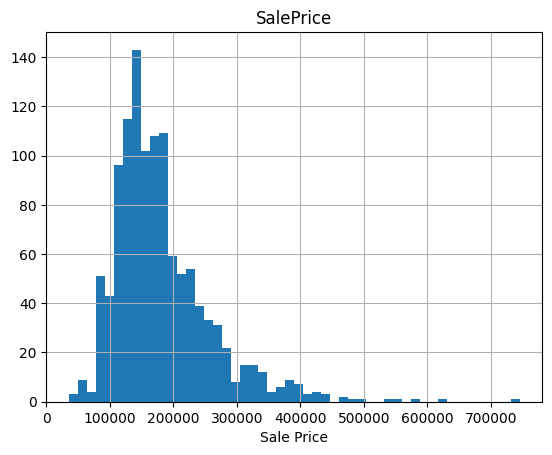

In [23]:
train_data.hist(column='SalePrice', bins=50)
plt.xlabel('Sale Price')

In [29]:
train_data = train_data.drop(columns="Id", axis=1)

In [ ]:
train_data = train_data.drop(columns=["MiscFeature"], axis=1)

In [30]:
train_data.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
254,20,RL,70.0,8400,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,145000
1066,60,RL,59.0,7837,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,178000
638,30,RL,67.0,8777,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,NaN,MnPrv,NaN,0,5,2008,WD,Normal,85000


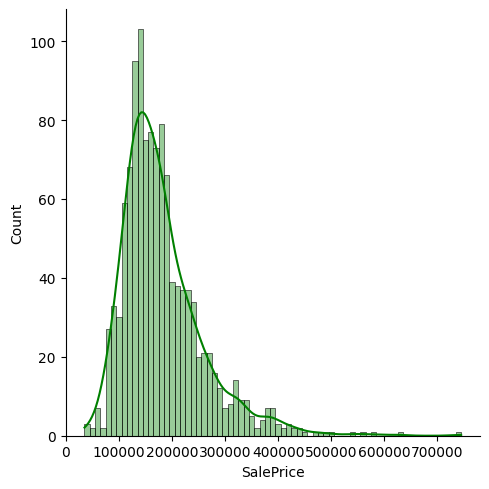

In [60]:
sns.displot(train_data['SalePrice'], color ='g', alpha = 0.4, bins = 100, kde= True, binwidth=10000) 


In [61]:
numerical_values = train_data.select_dtypes(include=[np.number])

array([[<Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>,
        <Axes: title={'center': 'YearBuilt'}>],
       [<Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>,
        <Axes: title={'center': 'TotalBsmtSF'}>],
       [<Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>,
        <Axes: title={'center': 'BsmtHalfBath'}>],
       [<Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>,
        <Axes: title={'center': 'Bedroo

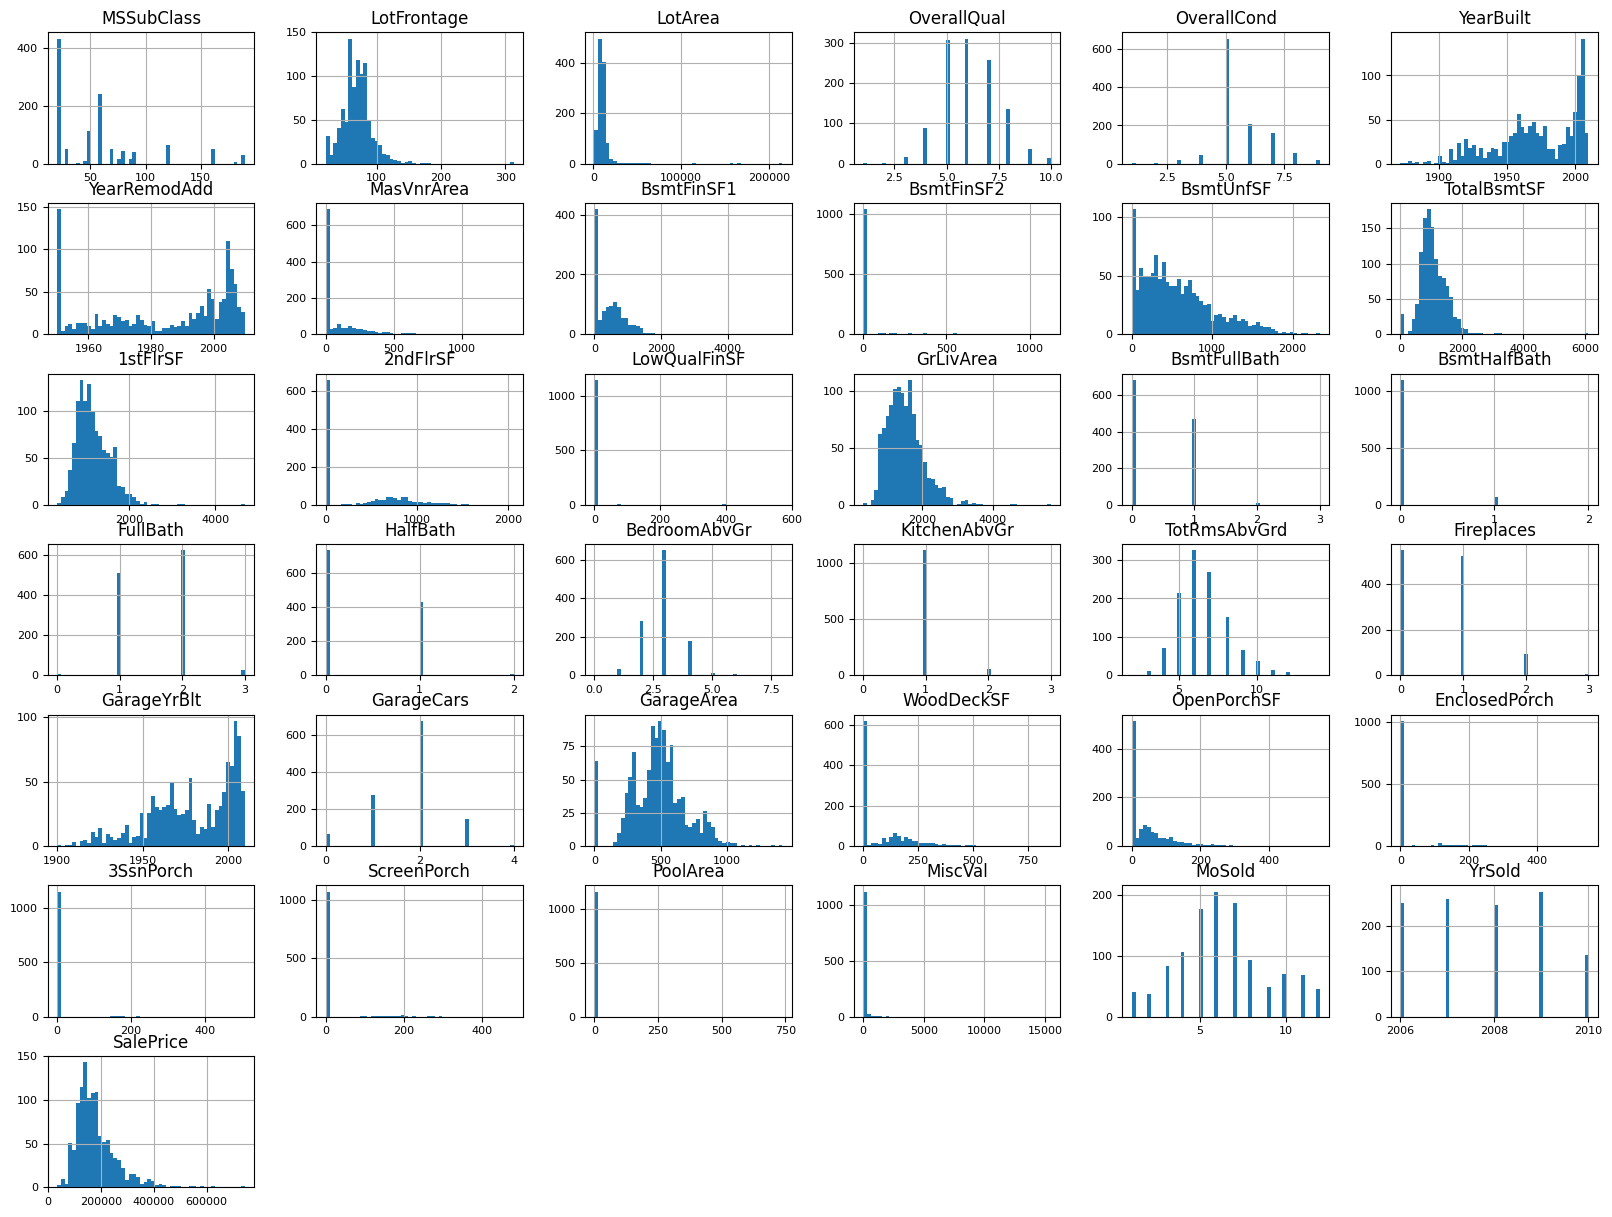

In [62]:
numerical_values.hist(figsize=(20, 15), bins=50, xlabelsize=8, ylabelsize=8)

In [ ]:
numerical_values.info() 
# ie

<class 'pandas.core.frame.DataFrame'>
Index: 1168 entries, 254 to 1126
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1168 non-null   int64  
 1   LotFrontage    951 non-null    float64
 2   LotArea        1168 non-null   int64  
 3   OverallQual    1168 non-null   int64  
 4   OverallCond    1168 non-null   int64  
 5   YearBuilt      1168 non-null   int64  
 6   YearRemodAdd   1168 non-null   int64  
 7   MasVnrArea     1162 non-null   float64
 8   BsmtFinSF1     1168 non-null   int64  
 9   BsmtFinSF2     1168 non-null   int64  
 10  BsmtUnfSF      1168 non-null   int64  
 11  TotalBsmtSF    1168 non-null   int64  
 12  1stFlrSF       1168 non-null   int64  
 13  2ndFlrSF       1168 non-null   int64  
 14  LowQualFinSF   1168 non-null   int64  
 15  GrLivArea      1168 non-null   int64  
 16  BsmtFullBath   1168 non-null   int64  
 17  BsmtHalfBath   1168 non-null   int64  
 18  FullBath   

### Feature Engineering and Data Visualization (Pipeline)

Since features like LotArea, GrLivArea, SalePrice, TotalBsmtSF, 1stFlrSF are highly right-skewed, we will pply log1p transform (np.log1p(x)) to reduce skewness and make distribution more Gaussian-like.

This should improve model performance, especially for linear models and some tree-based ones.

In [103]:
from sklearn.base import BaseEstimator, TransformerMixin


class LogTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, min_prop = 0.05, columns =["LotArea", "GrLivArea", "SalePrice", 
                                "TotalBsmtSF", "1stFlrSF", "LotFrontage",
                                "GarageArea", "ScreenPorch",
                                "BsmtUnfSF", "MasVnrArea", "BsmtFinSF1",
                                "BsmtFinSF2", "OpenPorchSF",]):
        self.min_prop = min_prop
        self.columns = columns


    def fit(self, X, y=None):
        self.sparse_columns = []
        for col in self.columns:
            value_counts = X[col].value_counts(normalize=True)
            zero_prop = value_counts.get(0, 0.0)
            if zero_prop >= self.min_prop: 
                self.sparse_columns.append(col)
        return self

    def transform(self, X):
        X = X.copy()
        if self.columns is not None:
            for col in self.columns:
                X[col] = np.log1p(X[col])
                if col in self.sparse_columns:
                    X[f"has_{col}"] = (X[col] > 0).astype(int)
        return X

class AgeCalculator(BaseEstimator, TransformerMixin):
    def __init__(self, columns=["YrSold", "YearBuilt"]):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        X["HouseAge"] = (X[self.columns[0]] - X[self.columns[1]]).astype(int)
        X["HouseAge"] = X["HouseAge"].clip(lower=0)
        return X

class FeatureImputer(BaseEstimator, TransformerMixin):
    def __init__(self, columns=["GarageYrBlt", "LotFrontage", "MasVnrArea"]):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        for col in self.columns:
            X[col] = X[col].fillna(0)
        return X



In [104]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ("log_transformer", LogTransformer()),
    ("age_calculator", AgeCalculator()),
    ("feature_imputer", FeatureImputer()),
])

train_data = pipeline.fit_transform(train_data)
val_data= pipeline.transform(val_data)
test_data = pipeline.transform(test_data)



c:\Users\felix\Anaconda\envs\ML_VU\lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


KeyError: 'SalePrice'

<Axes: >

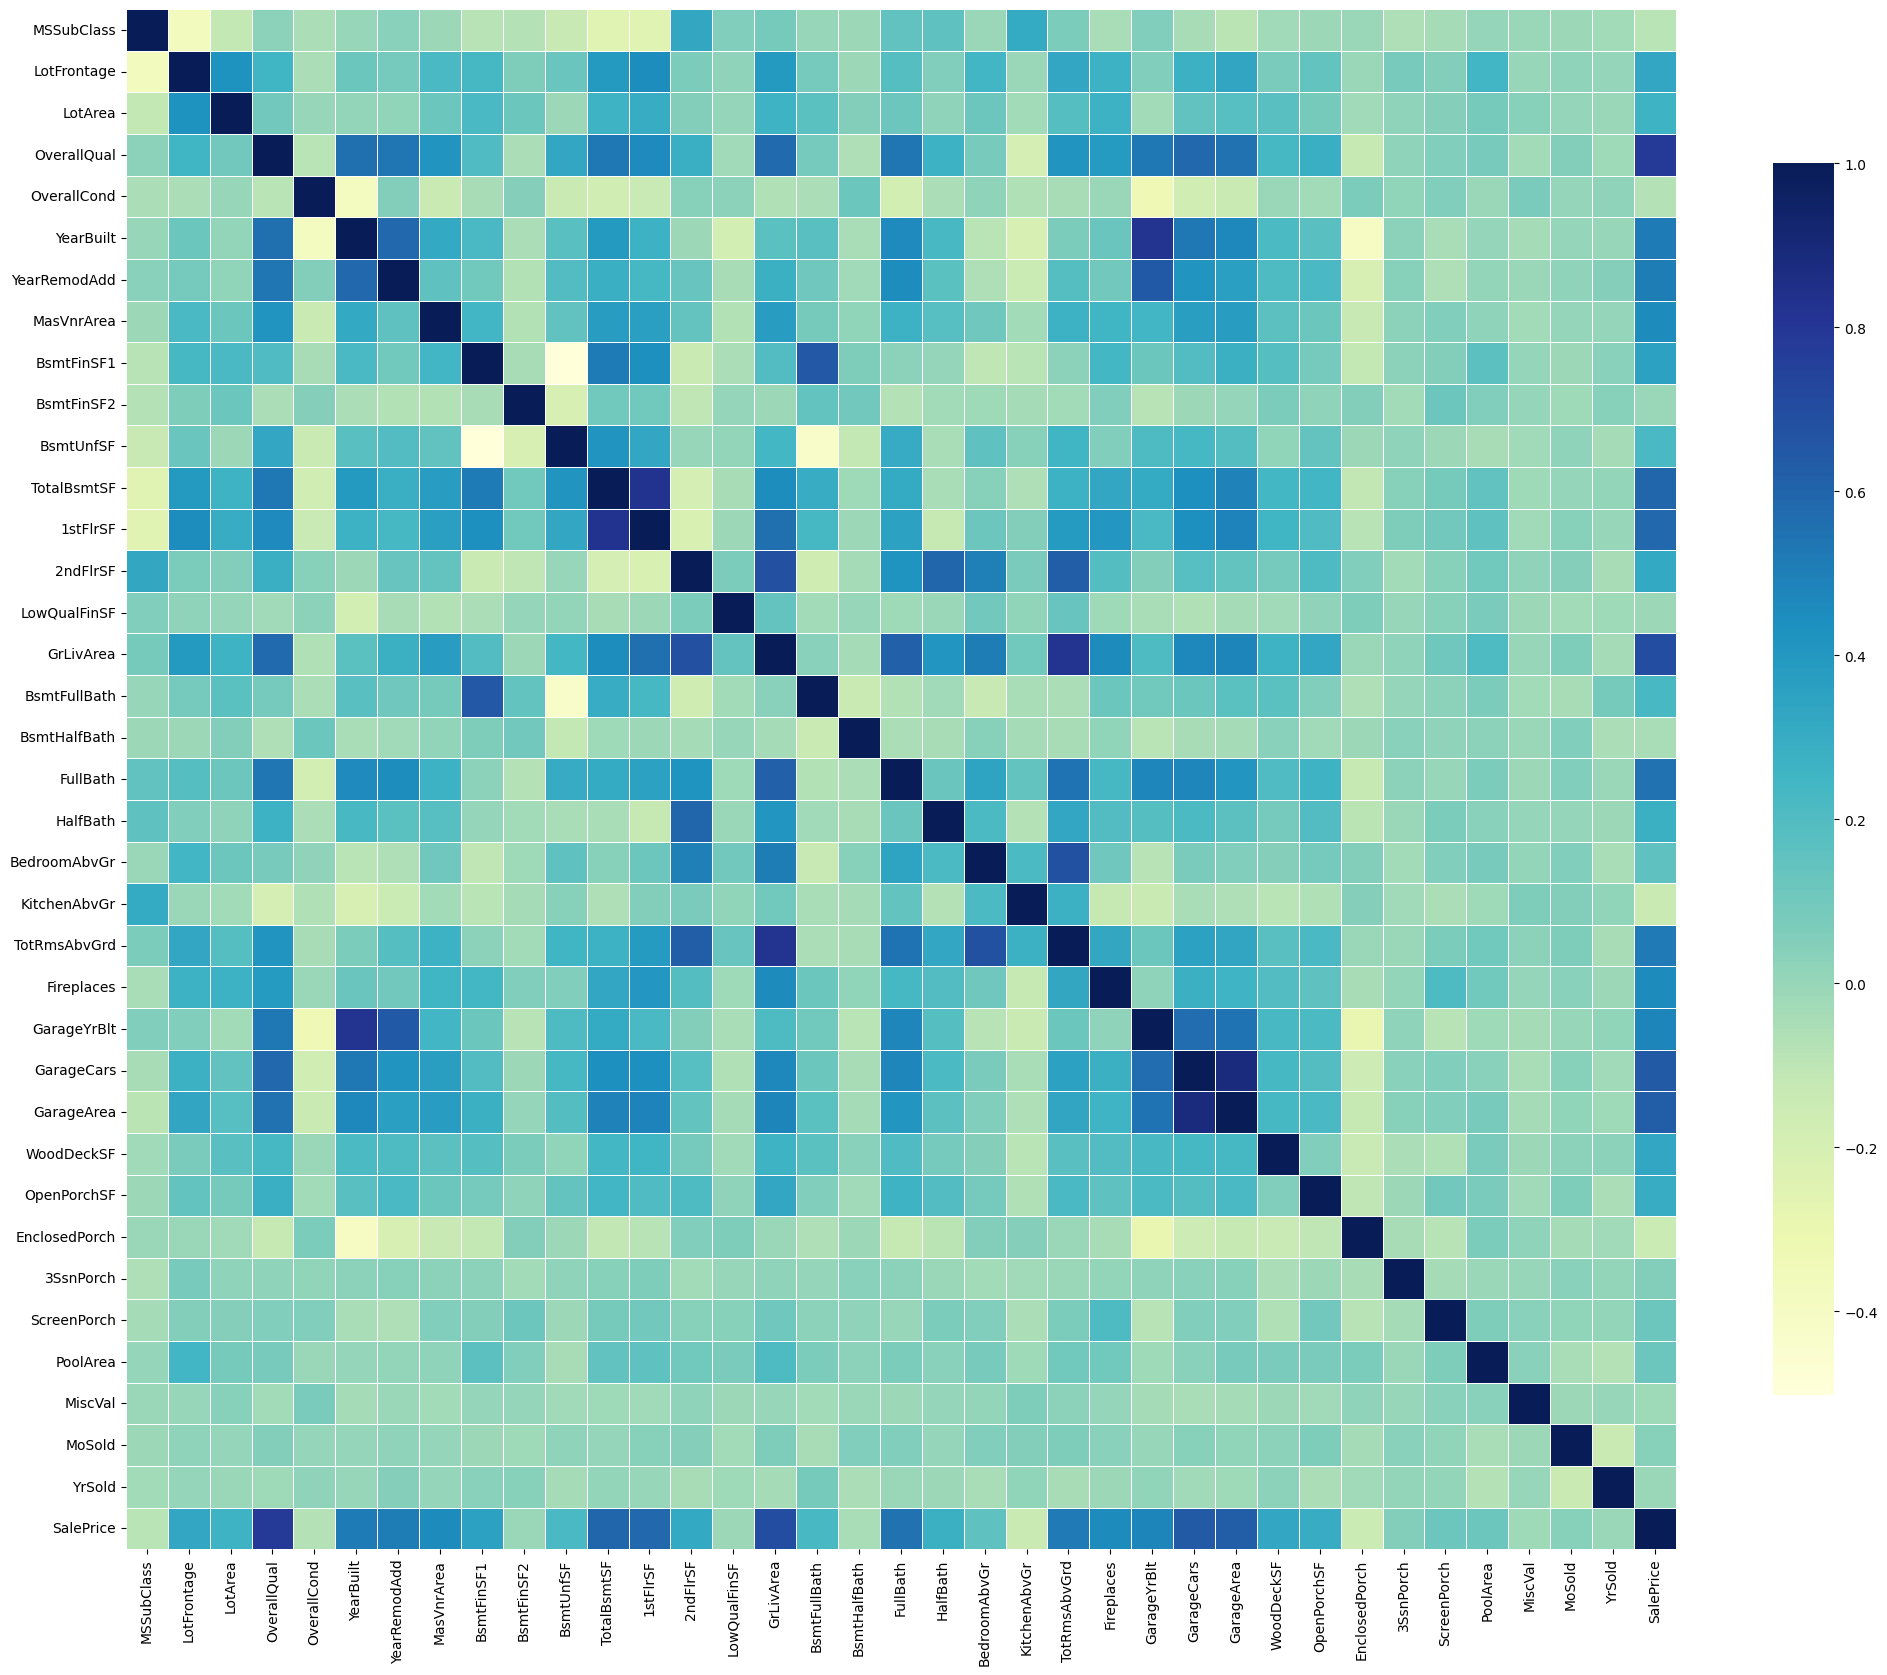

In [98]:
plt.figure(figsize=(25, 20))
sns.heatmap(numerical_values.corr(), fmt='.2f', cmap="YlGnBu", linewidths=0.5, cbar_kws={"shrink": .8})

Number of outliers in each column: MSSubClass       28
LotFrontage       0
LotArea          12
OverallQual       3
OverallCond      26
YearBuilt         2
YearRemodAdd      0
MasVnrArea        0
BsmtFinSF1        4
BsmtFinSF2       42
BsmtUnfSF         7
TotalBsmtSF       8
1stFlrSF          8
2ndFlrSF          3
LowQualFinSF     15
GrLivArea        15
BsmtFullBath     13
BsmtHalfBath     66
FullBath          0
HalfBath          8
BedroomAbvGr     11
KitchenAbvGr     56
TotRmsAbvGrd     10
Fireplaces        4
GarageYrBlt       0
GarageCars        0
GarageArea        5
WoodDeckSF       20
OpenPorchSF      23
EnclosedPorch    43
3SsnPorch        20
ScreenPorch      43
PoolArea          6
MiscVal           8
MoSold            0
YrSold            0
SalePrice        17
dtype: int64
